# Zero-Shot Classification
- classify books into genres(romantic, fantasy, novel) based on the first few sentences of the books

In [2]:
from transformers import pipeline
import pandas as pd
from IPython.display import display, Markdown

### Task definition and model selection

In [3]:
task = "zero-shot-classification"
model = "MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli"
classifier = pipeline(task=task, model=model)

Device set to use cpu


### Data preparation
 - first example: Jane Austen: Pride and Prejudice  (romantic novel)
 - second example: Lewis Carroll: Alice's Adventures in Wonderland (fantasy novel)
 - third example: Arthur Conan Doyle "The Return of Sherlock Holmes" (crime novel)

In [4]:
titles = ["Pride and Prejudice", "Alice's Adventures in Wonderland", "The Return of Sherlock Holmes"]

documents = [
 '''Walt Whitman has somewhere a fine and just distinction between “loving by 
allowance” and “loving with personal love.” This distinction applies to books as 
well as to men and women; and in the case of the not very numerous authors who are 
the objects of the personal affection, it brings a curious consequence with it. 
There is much more difference as to their best work than in the case of those 
others who are loved “by allowance” by convention, and because it is felt to be the 
right and proper thing to love them. And in the sect—fairly large and yet unusually 
choice—of Austenians or Janites, there would probably be found partisans of the 
claim to primacy of almost every one of the novels. To some the delightful 
freshness and humour of Northanger Abbey, its completeness, finish, and entrain, 
obscure the undoubted critical facts that its scale is small, and its scheme, after 
all, that of burlesque or parody, a kind in which the first rank is reached with 
difficulty.''',
 '''Alice was beginning to get very tired of sitting by her sister on the bank, 
and of having nothing to do: once or twice she had peeped into the book her sister 
was reading, but it had no pictures or conversations in it, and what is the use of 
a book, thought Alice “without pictures or conversations?    
So she was considering 
in her own mind (as well as she could, for the hot day made her feel very sleepy 
and stupid), whether the pleasure of making a daisy-chain would be worth the 
trouble of getting up and picking the daisies, when suddenly a White Rabbit with 
pink eyes ran close by her.''',
 '''It was in the spring of the year 1894 that all London was interested, and the 
fashionable world dismayed, by the murder of the Honourable Ronald Adair under most 
unusual and inexplicable circumstances. The public has already learned those 
particulars of the crime which came out in the police investigation, but a good 
deal was suppressed upon that occasion, since the case for the prosecution was so 
overwhelmingly strong that it was not necessary to bring forward all the facts. 
Only now, at the end of nearly ten years, am I allowed to supply those missing 
links which make up the whole of that remarkable chain. The crime was of interest 
in itself, but that interest was as nothing to me compared to the inconceivable 
sequel, which afforded me the greatest shock and surprise of any event in my 
adventurous life. Even now, after this long interval, I find myself thrilling as I 
think of it, and feeling once more that sudden flood of joy, amazement, and 
incredulity which utterly submerged my mind. Let me say to that public, which has 
shown some interest in those glimpses which I have occasionally given them of the 
thoughts and actions of a very remarkable man, that they are not to blame me if I 
have not shared my knowledge with them, for I should have considered it my first 
duty to do so, had I not been barred by a positive prohibition from his own lips, 
which was only withdrawn upon the third of last month.'''
 ]

### Classify documents

In [5]:
candidate_labels = ['romance', 'fantasy', 'crime']
results = classifier(documents, candidate_labels=candidate_labels)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


### Visualize results

<Axes: title={'center': "Alice's Adventures in Wonderland"}, xlabel='labels'>

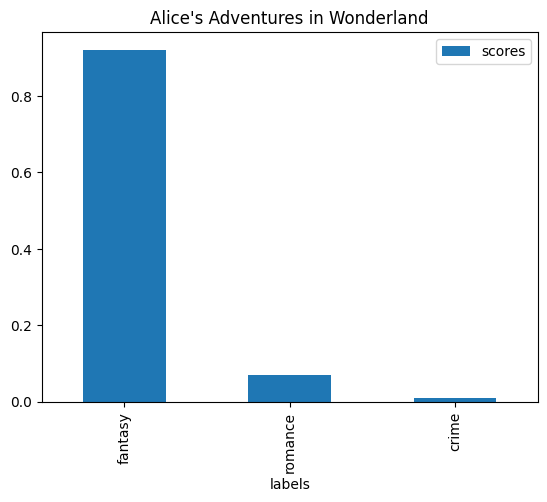

In [9]:
pos = 1
pd.DataFrame(results[pos]).plot.bar(x='labels', y='scores', title=titles[pos])